In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima import auto_arima
# from statsmodels.tsa.stattools import adfuller
# from sklearn.metrics import mean_squared_error
# from itertools import product
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import KFold
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from sklearn.preprocessing import MinMaxScaler
# from prophet import Prophet
# from statsmodels.tsa.holtwinters import ExponentialSmoothing
# from catboost import CatBoostRegressor, Pool

dow_jones_df = pd.read_csv("dow_jones_data_clean.csv")

# Display the first few rows and column names of the dataset
dow_jones_df.head(), dow_jones_df.columns

(                        Date  Adj Close     Close      High       Low  \
 0  1980-12-12 00:00:00+00:00   0.098943  0.128348  0.128906  0.128348   
 1  1980-12-15 00:00:00+00:00   0.093781  0.121652  0.122210  0.121652   
 2  1980-12-16 00:00:00+00:00   0.086898  0.112723  0.113281  0.112723   
 3  1980-12-17 00:00:00+00:00   0.089049  0.115513  0.116071  0.115513   
 4  1980-12-18 00:00:00+00:00   0.091630  0.118862  0.119420  0.118862   
 
        Open     Volume Ticker  
 0  0.128348  469033600   AAPL  
 1  0.122210  175884800   AAPL  
 2  0.113281  105728000   AAPL  
 3  0.115513   86441600   AAPL  
 4  0.118862   73449600   AAPL  ,
 Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
        'Ticker'],
       dtype='object'))

In [7]:
dow_jones_df.info()
dow_jones_df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361538 entries, 0 to 361537
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       361538 non-null  object 
 1   Adj Close  361538 non-null  float64
 2   Close      361538 non-null  float64
 3   High       361538 non-null  float64
 4   Low        361538 non-null  float64
 5   Open       361538 non-null  float64
 6   Volume     361538 non-null  int64  
 7   Ticker     361538 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 22.1+ MB


,Date,Adj Close,Close,High,Low,Open,Volume,Ticker
count,361538,361538.000000,361538.000000,361538.000000,361538.000000,361538.000000,3.615380e+05,361538
unique,15821,NaN,NaN,NaN,NaN,NaN,NaN,28
top,2012-04-20 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,KO
freq,28,NaN,NaN,NaN,NaN,NaN,NaN,15821
mean,NaN,34.735950,44.823122,45.261430,44.365490,44.636039,2.053661e+07,NaN
std,NaN,59.699655,64.121151,64.724787,63.490108,64.223467,8.102556e+07,NaN
min,NaN,0.002845,0.005208,0.005208,0.004801,0.000000,0.000000e+00,NaN
25%,NaN,1.324075,4.270833,4.312500,4.226386,3.733622,2.124347e+06,NaN
50%,NaN,11.948401,21.945000,22.187500,21.690001,21.920000,5.294992e+06,NaN
75%,NaN,40.156898,55.970001,56.500000,55.408287,55.972920,1.253280e+07,NaN


In [8]:
# Check for missing values
missing_values = dow_jones_df.isnull().sum()
missing_values

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Ticker       0
dtype: int64

In [9]:
# Convert 'Date' column to datetime format
dow_jones_df['Date'] = pd.to_datetime(dow_jones_df['Date'])

# Set 'Date' as the index
dow_jones_df.set_index('Date', inplace=True)

# Display the updated DataFrame
dow_jones_df.head()

,Adj Close,Close,High,Low,Open,Volume,Ticker
Date,,,,,,,
1980-12-12 00:00:00+00:00,0.098943,0.128348,0.128906,0.128348,0.128348,469033600,AAPL
1980-12-15 00:00:00+00:00,0.093781,0.121652,0.122210,0.121652,0.122210,175884800,AAPL
1980-12-16 00:00:00+00:00,0.086898,0.112723,0.113281,0.112723,0.113281,105728000,AAPL
1980-12-17 00:00:00+00:00,0.089049,0.115513,0.116071,0.115513,0.115513,86441600,AAPL
1980-12-18 00:00:00+00:00,0.091630,0.118862,0.119420,0.118862,0.118862,73449600,AAPL


for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    
    # Create a new figure for each ticker
    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label=ticker)
    
    plt.title(f'Time Series of Closing Prices for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

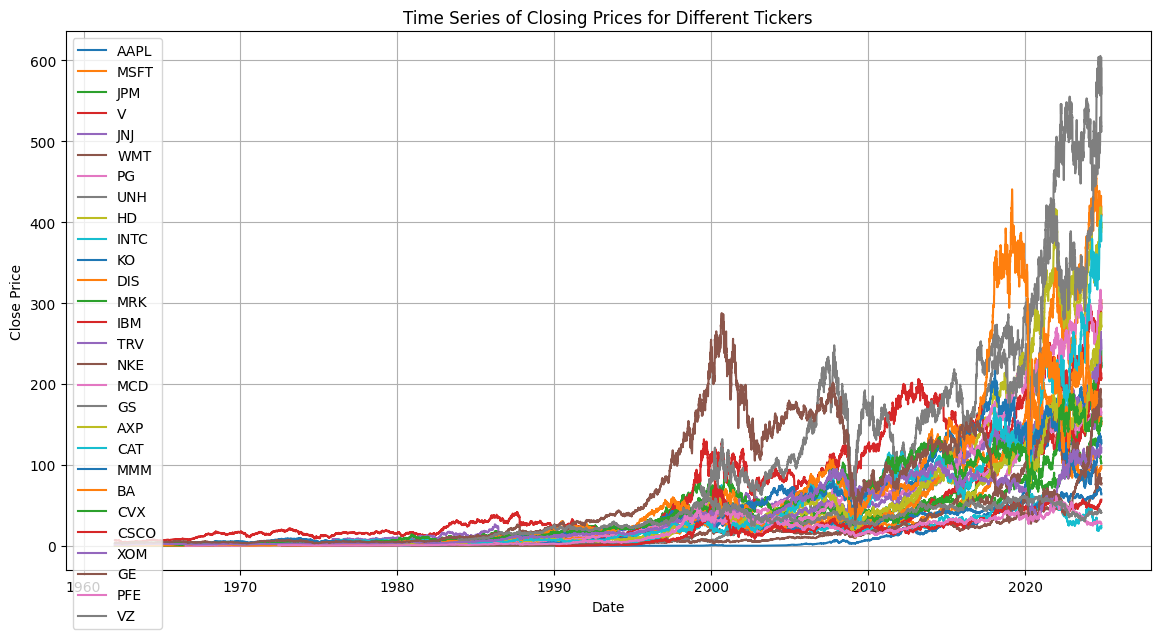

In [10]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Close'], label=ticker)

plt.title('Time Series of Closing Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

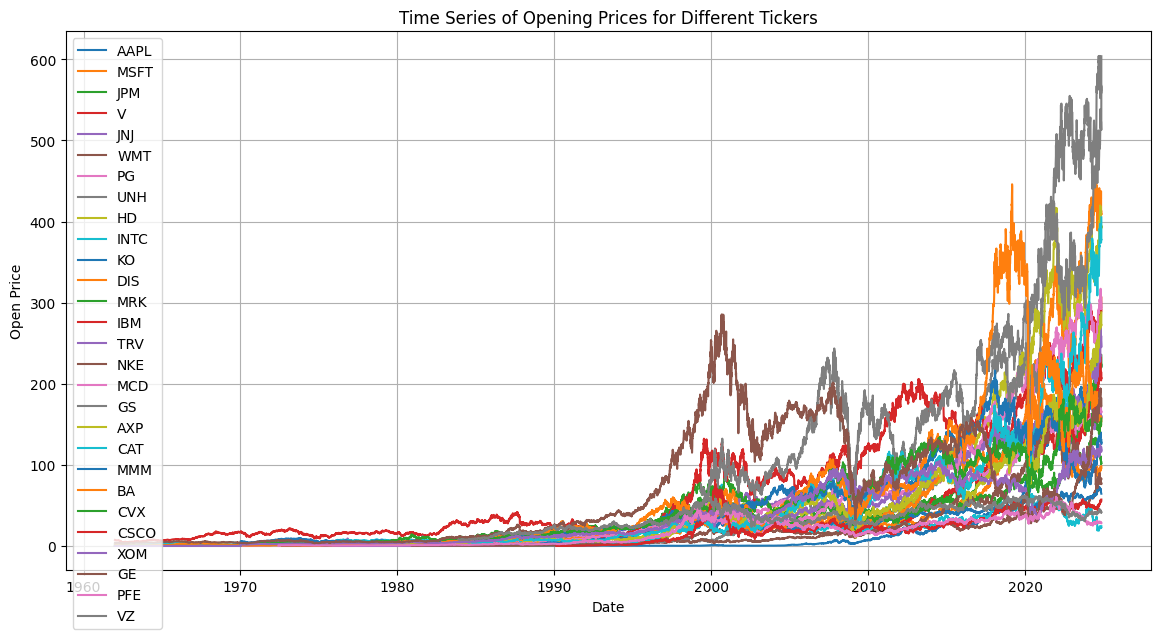

In [11]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Open'], label=ticker)

plt.title('Time Series of Opening Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid(True)
plt.show()

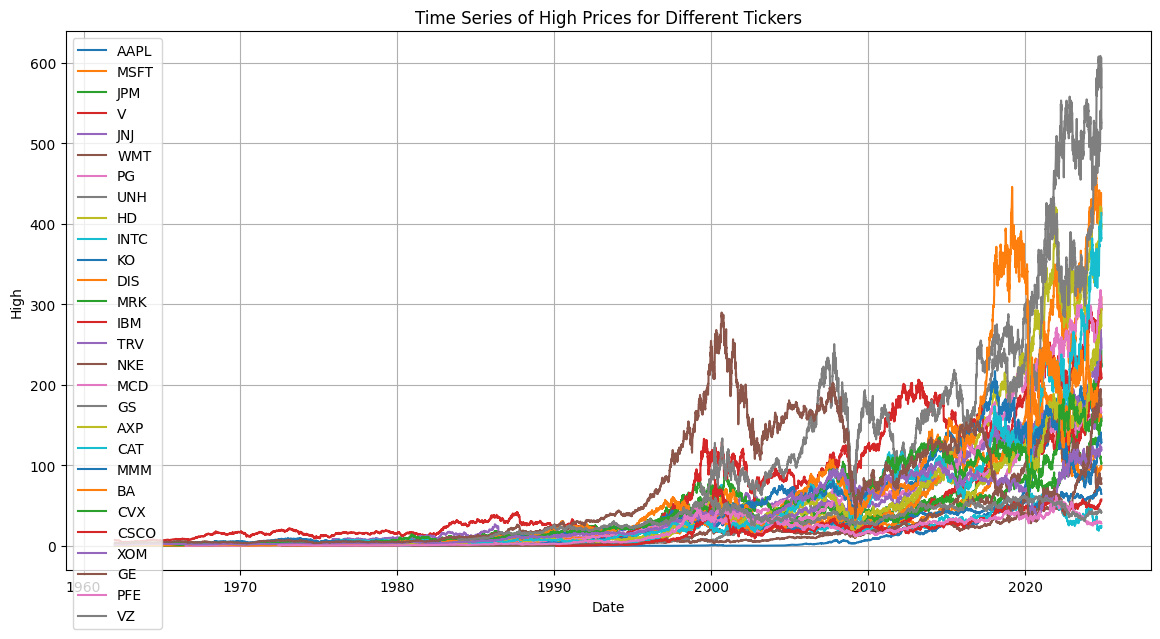

In [12]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['High'], label=ticker)

plt.title('Time Series of High Prices for Different Tickers')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.grid(True)
plt.show()

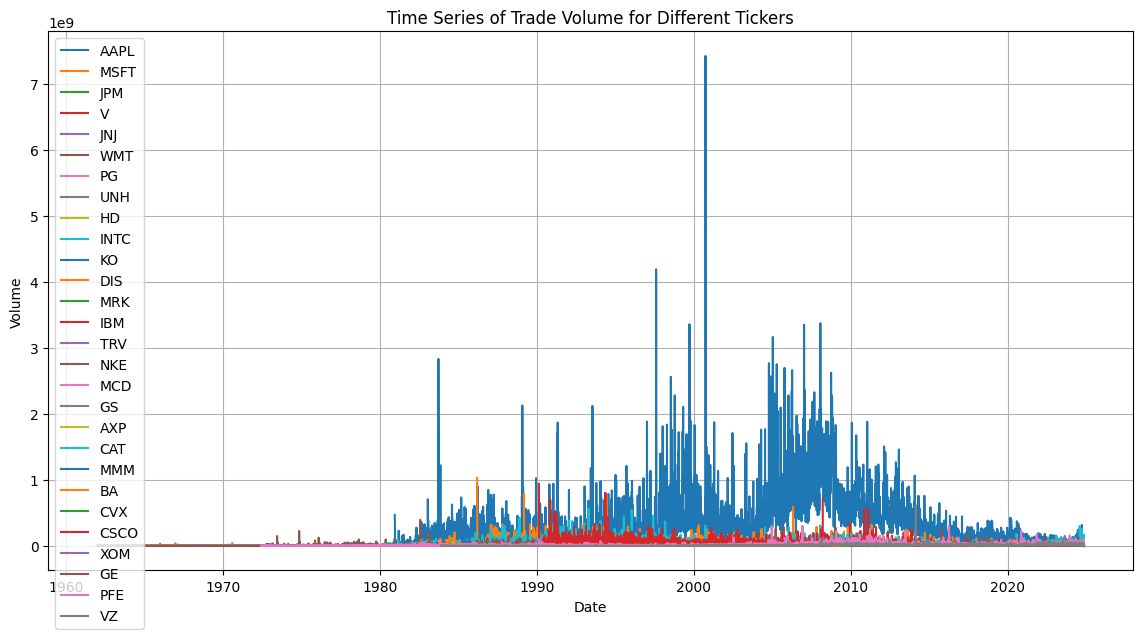

In [13]:
plt.figure(figsize=(14, 7))
for ticker in dow_jones_df['Ticker'].unique():
    ticker_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
    plt.plot(ticker_data.index, ticker_data['Volume'], label=ticker)

plt.title('Time Series of Trade Volume for Different Tickers')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

### ARIMA

/Users/isaya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isaya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isaya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/isaya/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.

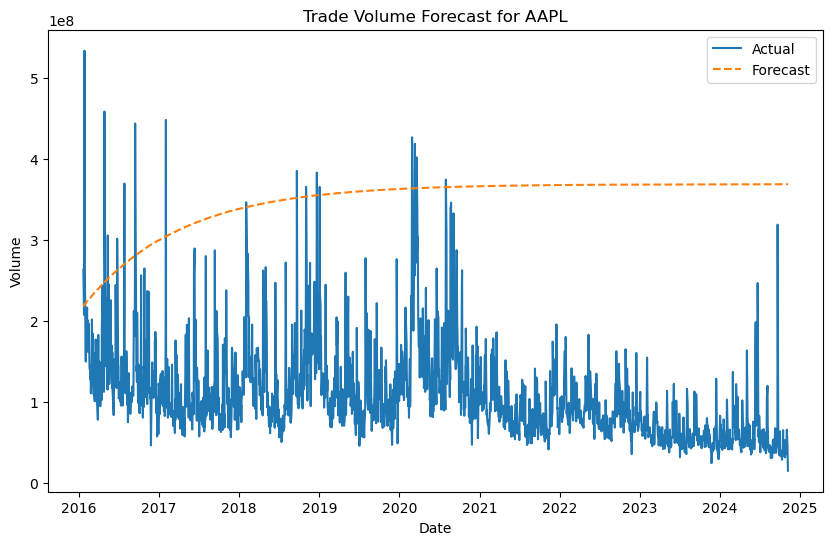

ARIMA Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 8854
Model:                 ARIMA(2, 0, 2)   Log Likelihood             -182291.698
Date:                Mon, 02 Dec 2024   AIC                         364595.396
Time:                        11:59:54   BIC                         364637.928
Sample:                             0   HQIC                        364609.880
                               - 8854                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.687e+08   4.12e-13   8.95e+20      0.000    3.69e+08    3.69e+08
ar.L1          1.5439      0.017     90.809      0.000       1.511       1.577
ar.L2         -0.5454      0

In [17]:
# Initialize a dictionary to store ARIMA models and forecasts for each stock
arima_results = {}

# Loop through each stock ticker in the dataset
# for ticker in dow_jones_df['Ticker'].unique():
ticker = 'AAPL'

stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
stock_data = stock_data['Volume']  # Extract the 'Volume' column

# Train-test split (80-20)
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

# Fit an ARIMA model (order can be adjusted)
model = ARIMA(train, order=(2, 0, 2))  # Example ARIMA(5,1,0) order
model_fit = model.fit()

# Forecast on test data
forecast = model_fit.forecast(steps=len(test))

# Store results
arima_results[ticker] = {
    'model': model_fit,
    'forecast': forecast,
    'test': test
}

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title(f'Trade Volume Forecast for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Example: Access ARIMA model summary for a specific stock
ticker_example = list(arima_results.keys())[0]
print(f"ARIMA Summary for {ticker_example}:")
print(arima_results[ticker_example]['model'].summary())

ARIMA requires a stationary series (constant mean and variance over time). Will use Augmented Dickey-Fuller to check for stationarity.

In [10]:
# Perform the ADF test on the volume data for the specified ticker
adf_result = adfuller(train)

print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")

# Check if the series is stationary
if adf_result[1] <= 0.05:
    print("The series is stationary (p-value <= 0.05).")
else:
    print("The series is not stationary (p-value > 0.05). Consider differencing.")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -5.308606896339865
p-value: 5.2552898202018575e-06
Critical Values: {'1%': -3.431091633128763, '5%': -2.8618677528979655, '10%': -2.5669444578776335}
The series is stationary (p-value <= 0.05).


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=364600.110, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=366849.924, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=366074.566, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=365364.448, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=366847.925, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=364591.064, Time=1.55 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=365632.742, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=364579.601, Time=2.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=365330.243, Time=0.40 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=364545.906, Time=2.76 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=365142.506, Time=0.51 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=364528.535, Time=4.12 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=365086.168, Time=0.57 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=364526.239, Time=7.50 sec
 ARIM

C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


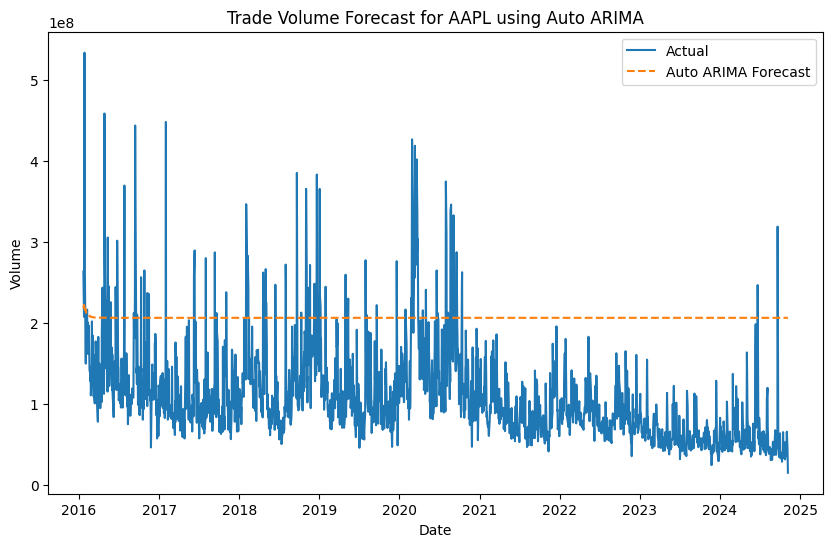

In [11]:
# Fit Auto ARIMA on the training data
auto_arima_model = auto_arima(
    train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    seasonal=False,
    trace=True,  
    error_action='ignore',  # Ignores non-converging models
    suppress_warnings=True,
    stepwise=True  # Searches for optimal parameters stepwise
)

print(auto_arima_model.summary())

# Forecast using the best model from Auto ARIMA
forecast_auto_arima = auto_arima_model.predict(n_periods=len(test))

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_auto_arima, label='Auto ARIMA Forecast', linestyle='--')
plt.title(f'Trade Volume Forecast for {ticker} using Auto ARIMA')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### LSTM

Epoch 1/10
276/276 [==============================] - 9s 26ms/step - loss: 9.8791e-04 - val_loss: 6.7574e-04
Epoch 2/10
276/276 [==============================] - 7s 25ms/step - loss: 8.5107e-04 - val_loss: 7.2810e-04
Epoch 3/10
276/276 [==============================] - 7s 25ms/step - loss: 8.3731e-04 - val_loss: 6.0866e-04
Epoch 4/10
276/276 [==============================] - 7s 25ms/step - loss: 7.7801e-04 - val_loss: 5.5510e-04
Epoch 5/10
276/276 [==============================] - 7s 24ms/step - loss: 7.8697e-04 - val_loss: 6.2648e-04
Epoch 6/10
276/276 [==============================] - 7s 25ms/step - loss: 7.5473e-04 - val_loss: 5.4139e-04
Epoch 7/10
276/276 [==============================] - 7s 24ms/step - loss: 7.6984e-04 - val_loss: 5.6377e-04
Epoch 8/10
276/276 [==============================] - 7s 24ms/step - loss: 7.6783e-04 - val_loss: 5.3635e-04
Epoch 9/10
276/276 [==============================] - 7s 25ms/step - loss: 7.5968e-04 - val_loss: 5.2964e-04
Epoch 10/10
69/69 [

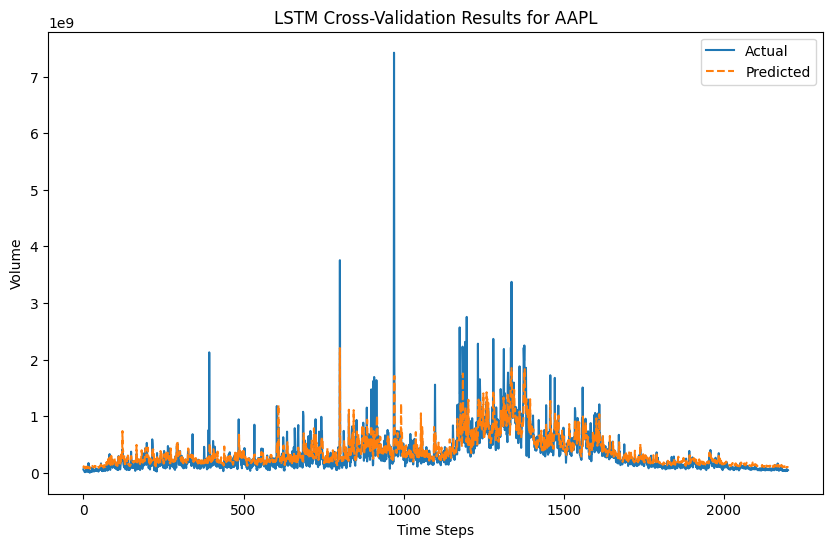

Cross-Validation Results for AAPL:
Fold MSE: [3.1805051744559924e+16, 4.3601763051978664e+16, 2.801622603886174e+16, 3.235411287425793e+16, 5.510792294814967e+16]
Average MSE: 38177015331561584.0000
Results for AAPL:
Average MSE: 38177015331561584.0000


In [12]:
# Cross-validation results storage
cv_results = {}

# Loop through each stock ticker in the dataset
# for ticker in dow_jones_df['Ticker'].unique():
ticker = 'AAPL'

stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]['Volume'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
stock_data_scaled = scaler.fit_transform(stock_data)

# Create sequences of 60 time steps
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(stock_data_scaled, time_steps)

# Reshape input for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Perform K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_mse = []
predictions_all_folds = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the LSTM model with Dropout to prevent overfitting
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # EarlyStopping to avoid overfitting
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

    # Make predictions on the test fold
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Calculate and store MSE for this fold
    mse = mean_squared_error(y_test_actual, predictions)
    fold_mse.append(mse)

    # Store predictions for visualization
    predictions_all_folds.append((y_test_actual, predictions))

# Store overall results for this stock
cv_results[ticker] = {
    'mse': fold_mse,
    'avg_mse': np.mean(fold_mse),
    'predictions': predictions_all_folds
}

# Plot actual vs predicted for the last fold
plt.figure(figsize=(10, 6))
plt.plot(predictions_all_folds[-1][0], label='Actual')
plt.plot(predictions_all_folds[-1][1], label='Predicted', linestyle='--')
plt.title(f'LSTM Cross-Validation Results for {ticker}')
plt.xlabel('Time Steps')
plt.ylabel('Volume')
plt.legend()
plt.show()

print(f"Cross-Validation Results for {ticker}:")
print(f"Fold MSE: {fold_mse}")
print(f"Average MSE: {np.mean(fold_mse):.4f}")

# Example: Access cross-validation results for a specific stock
ticker_example = list(cv_results.keys())[0]
print(f"Results for {ticker_example}:")
print(f"Average MSE: {cv_results[ticker_example]['avg_mse']:.4f}")


# Prepare to store results
lstm_results = {}

# Loop through each stock ticker in the dataset
for ticker in dow_jones_df['Ticker'].unique():
    stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]['Volume'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    stock_data_scaled = scaler.fit_transform(stock_data)

    # Create sequences of 60 time steps
    def create_sequences(data, time_steps=60):
        X, y = [], []
        for i in range(time_steps, len(data)):
            X.append(data[i - time_steps:i, 0])
            y.append(data[i, 0])
        return np.array(X), np.array(y)

    time_steps = 60
    X, y = create_sequences(stock_data_scaled, time_steps)

    # Split into training and testing sets (80-20)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1)

    # Make predictions
    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

    # Inverse transform actual values
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Store results
    lstm_results[ticker] = {
        'model': model,
        'predictions': predictions,
        'actual': y_test_actual
    }

    # Plot actual vs predictions
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_actual, label='Actual')
    plt.plot(predictions, label='Predicted', linestyle='--')
    plt.title(f'Trade Volume Forecast with LSTM for {ticker}')
    plt.xlabel('Time Steps')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

# Example: Access LSTM predictions for a specific stock
ticker_example = list(lstm_results.keys())[0]
print(f"LSTM Predictions for {ticker_example}:")
print(lstm_results[ticker_example]['predictions'][:5])

### Prophet

23:49:59 - cmdstanpy - INFO - Chain [1] start processing
23:50:02 - cmdstanpy - INFO - Chain [1] done processing


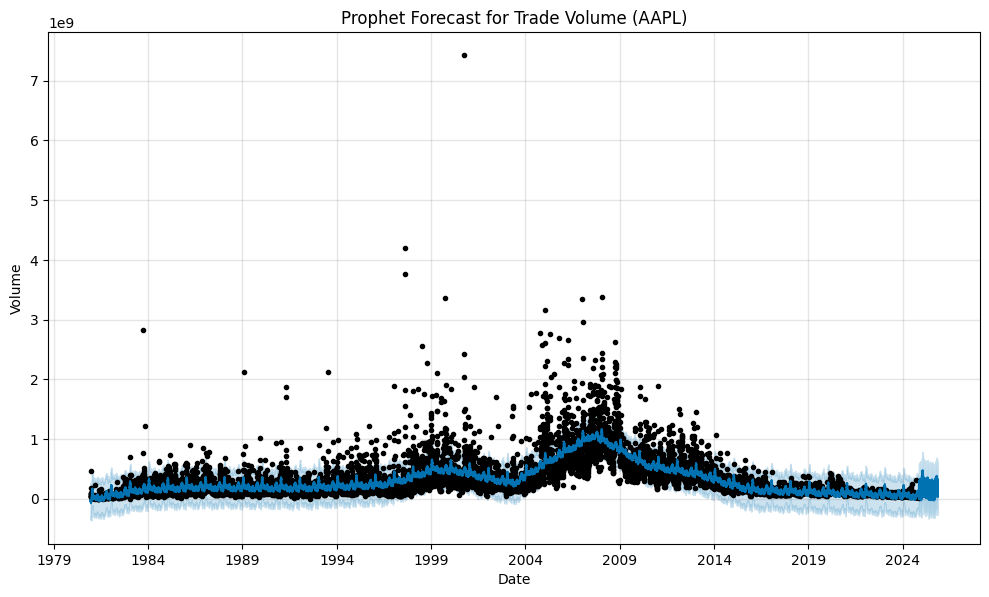

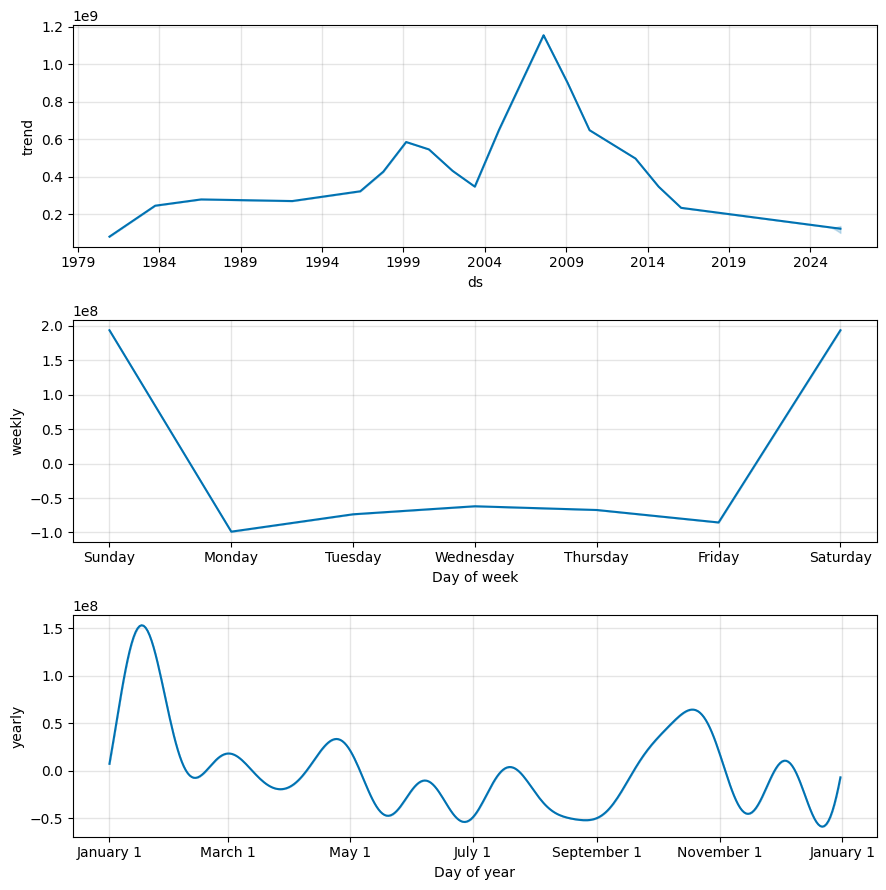

In [13]:
# Filter data for the specified ticker
ticker = 'AAPL'
stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]

# Prepare the data for Prophet
prophet_data = stock_data[['Volume']].reset_index()
prophet_data.columns = ['ds', 'y']  # Prophet requires columns 'ds' for dates and 'y' for values

# Remove timezone from 'ds' column
prophet_data['ds'] = prophet_data['ds'].dt.tz_localize(None)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=365)  # Extend the forecast for 365 days
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title(f'Prophet Forecast for Trade Volume ({ticker})')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.show()


23:50:04 - cmdstanpy - INFO - Chain [1] start processing
23:50:08 - cmdstanpy - INFO - Chain [1] done processing


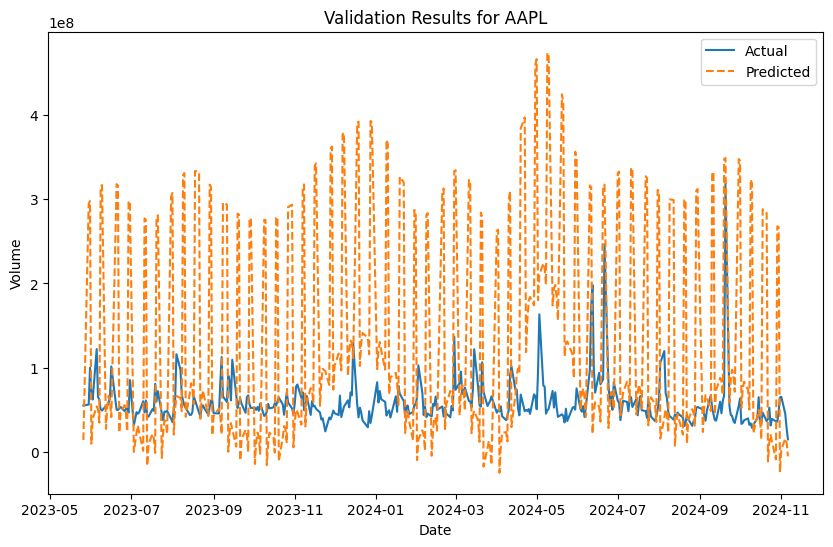

In [14]:
# Split data into training and validation sets
train = prophet_data.iloc[:-365]
validation = prophet_data.iloc[-365:]

# Instantiate a new Prophet model
validation_model = Prophet()

# Fit the model on the training data
validation_model.fit(train)

# Make predictions for the validation set
validation_future = validation_model.make_future_dataframe(periods=len(validation))
validation_forecast = validation_model.predict(validation_future)

# Compare actual vs. predicted
validation_results = pd.DataFrame({
    'ds': validation['ds'],
    'Actual': validation['y'],
    'Predicted': validation_forecast['yhat'].iloc[-len(validation):].values
})

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(validation_results['ds'], validation_results['Actual'], label='Actual')
plt.plot(validation_results['ds'], validation_results['Predicted'], label='Predicted', linestyle='--')
plt.title(f'Validation Results for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


### Exponential Smoothing

C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Isaya Acevedo\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an except

Mean Squared Error: 11250325901142728.0000


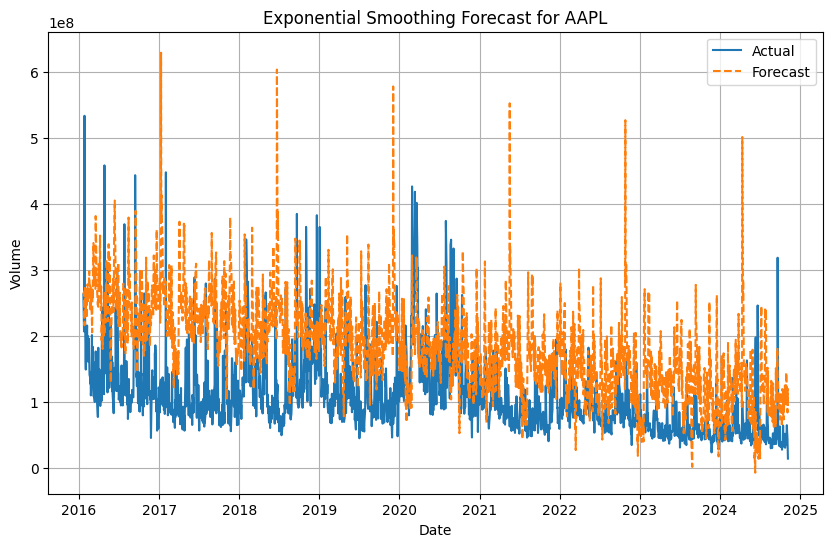

In [15]:
ticker = 'AAPL'
stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]
volume_data = stock_data['Volume']

train_size = int(len(volume_data) * 0.8)
train, test = volume_data[:train_size], volume_data[train_size:]

# Fit the Exponential Smoothing model with trend and seasonality
model = ExponentialSmoothing(
    train,
    trend="additive",   # Additive trend
    seasonal="additive",  # Additive seasonality
    seasonal_periods=365,  # Define seasonal periods
)
fitted_model = model.fit(optimized=True)

# Forecast for the test period
forecast = fitted_model.forecast(steps=len(test))

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse:.4f}")

# Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title(f'Exponential Smoothing Forecast for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

### CatBoost

Training CatBoost model...
0:	learn: 343477784.9397839	test: 260135215.0998612	best: 260135215.0998612 (0)	total: 164ms	remaining: 54m 32s
50:	learn: 172460870.5151395	test: 88009937.1656231	best: 88009937.1656231 (50)	total: 1.06s	remaining: 6m 54s
100:	learn: 151756205.8765404	test: 71041554.9799508	best: 71041554.9799508 (100)	total: 2s	remaining: 6m 33s
150:	learn: 141019636.3507856	test: 65306230.8027939	best: 65306230.8027939 (150)	total: 2.92s	remaining: 6m 23s
200:	learn: 131547770.7518017	test: 64551658.1828656	best: 64477133.5940766 (196)	total: 3.85s	remaining: 6m 19s
250:	learn: 122726931.3295924	test: 63330919.6337843	best: 63330919.6337843 (250)	total: 4.76s	remaining: 6m 14s
300:	learn: 115829068.4449385	test: 62084144.8345858	best: 62084144.8345858 (300)	total: 5.68s	remaining: 6m 11s
350:	learn: 109284555.1709538	test: 61108126.0148482	best: 61056593.1610138 (345)	total: 6.59s	remaining: 6m 9s
400:	learn: 103882332.4011289	test: 59242295.4269898	best: 59235743.0690592 

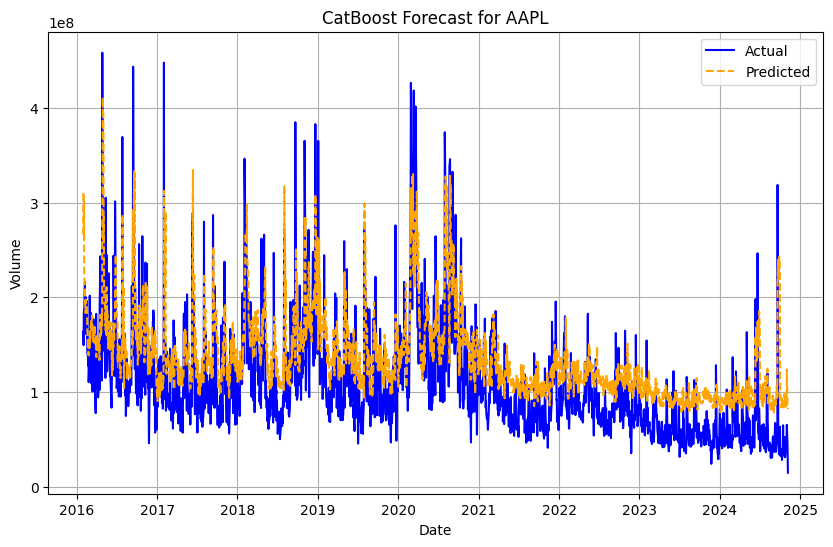

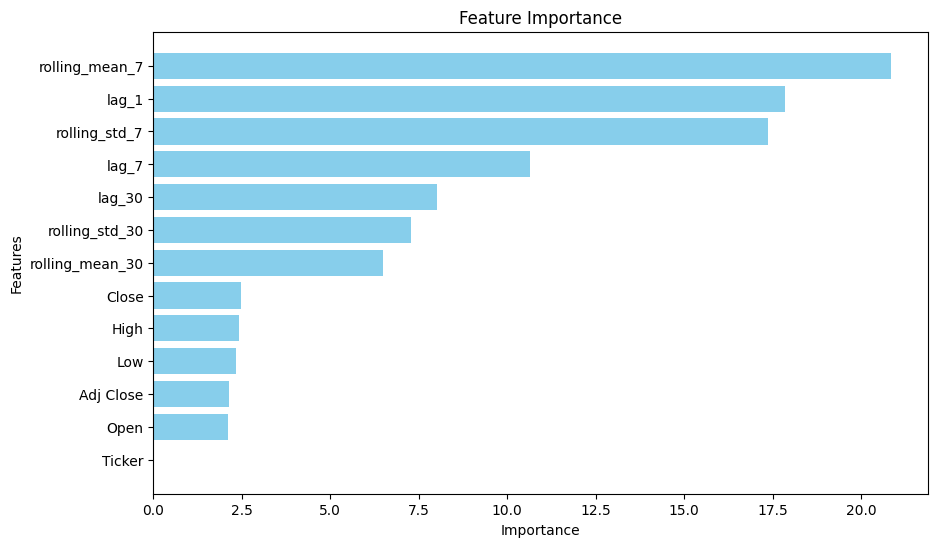

In [17]:
# Filter data for the specific ticker
ticker = 'AAPL'
stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]

# Ensure the index is sorted
stock_data.sort_index(inplace=True)

# Add lag features and rolling statistics
def create_features(data, target_col, lags=[1, 7, 30], rolling_windows=[7, 30]):
    df = data.copy()
    for lag in lags:
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    for window in rolling_windows:
        df[f'rolling_mean_{window}'] = df[target_col].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df[target_col].rolling(window=window).std()
    df.dropna(inplace=True)
    return df

# Prepare the dataset
stock_data = create_features(stock_data, target_col='Volume')

# Train-test split (80-20)
train_size = int(len(stock_data) * 0.8)
train = stock_data.iloc[:train_size]
test = stock_data.iloc[train_size:]

# Define features and target
X_train = train.drop('Volume', axis=1)
y_train = train['Volume']
X_test = test.drop('Volume', axis=1)
y_test = test['Volume']

# Specify categorical features (e.g., Ticker)
cat_features = [X_train.columns.get_loc('Ticker')]  # Index of the 'Ticker' column

# Define CatBoost Regressor
catboost_model = CatBoostRegressor(
    iterations=20000,
    depth=10,
    learning_rate=0.05,
    loss_function='RMSE',
    eval_metric='RMSE',
    verbose=50,
    early_stopping_rounds=5000
)

# Train the model
print("Training CatBoost model...")
catboost_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), use_best_model=True)

# Make predictions
print("Making predictions...")
predictions = catboost_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"CatBoost Mean Squared Error: {mse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, predictions, label='Predicted', color='orange', linestyle='--')
plt.title(f'CatBoost Forecast for {ticker}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': catboost_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

Fold 1
0:	learn: 320877145.5537574	test: 336412081.8629766	best: 336412081.8629766 (0)	total: 20.6ms	remaining: 6m 51s
50:	learn: 153369438.7226939	test: 210429350.1086183	best: 210429350.1086183 (50)	total: 994ms	remaining: 6m 28s
100:	learn: 134712174.6723436	test: 207580507.4545593	best: 207241369.8111618 (87)	total: 2s	remaining: 6m 33s
150:	learn: 123887315.0840160	test: 207515557.6143003	best: 207241369.8111618 (87)	total: 2.96s	remaining: 6m 29s
200:	learn: 115421089.6475833	test: 208315880.9890106	best: 207241369.8111618 (87)	total: 3.93s	remaining: 6m 27s
250:	learn: 106745621.3905286	test: 208550257.5696005	best: 207241369.8111618 (87)	total: 4.91s	remaining: 6m 26s
300:	learn: 99529260.7147409	test: 208876865.5171976	best: 207241369.8111618 (87)	total: 5.87s	remaining: 6m 24s
350:	learn: 94044031.5295853	test: 209344262.3243980	best: 207241369.8111618 (87)	total: 6.84s	remaining: 6m 22s
400:	learn: 88805319.0084039	test: 209473699.3401215	best: 207241369.8111618 (87)	total: 

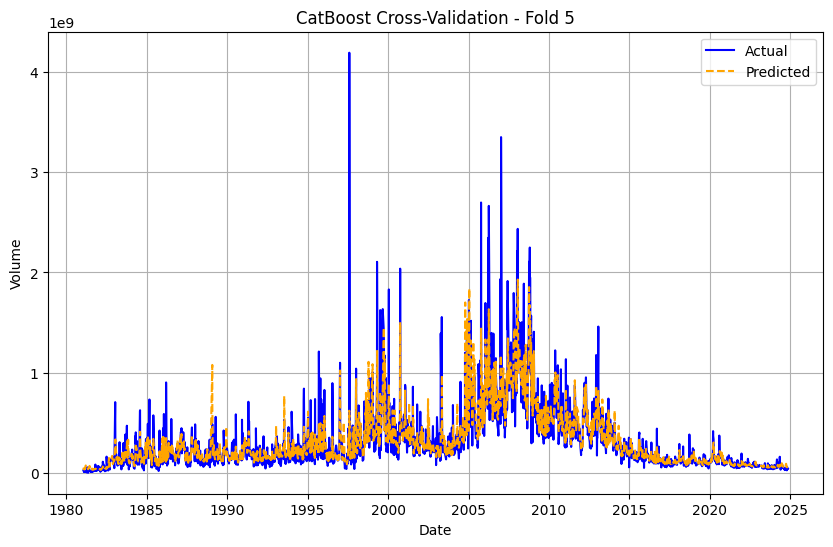

In [18]:
# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Storage for results
cv_mse = []
cv_predictions = []

# Filter data for the specific ticker
ticker = 'AAPL'
stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker]

# Ensure the index is sorted
stock_data.sort_index(inplace=True)

# Add lag features and rolling statistics
def create_features(data, target_col, lags=[1, 7, 30], rolling_windows=[7, 30]):
    df = data.copy()
    for lag in lags:
        df[f'lag_{lag}'] = df[target_col].shift(lag)
    for window in rolling_windows:
        df[f'rolling_mean_{window}'] = df[target_col].rolling(window=window).mean()
        df[f'rolling_std_{window}'] = df[target_col].rolling(window=window).std()
    df.dropna(inplace=True)
    return df

# Prepare the dataset
stock_data = create_features(stock_data, target_col='Volume')

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(stock_data)):
    print(f"Fold {fold + 1}")
    
    # Split data into training and testing sets for this fold
    train, test = stock_data.iloc[train_index], stock_data.iloc[test_index]
    X_train, y_train = train.drop('Volume', axis=1), train['Volume']
    X_test, y_test = test.drop('Volume', axis=1), test['Volume']
    
    # Specify categorical features (e.g., Ticker)
    cat_features = [X_train.columns.get_loc('Ticker')]  # Index of the 'Ticker' column

    # Define CatBoost Regressor
    catboost_model = CatBoostRegressor(
        iterations=20000,
        depth=10,
        learning_rate=0.05,
        loss_function='RMSE',
        eval_metric='RMSE',
        verbose=50,
        early_stopping_rounds=5000
    )

    # Train the model
    catboost_model.fit(X_train, y_train, cat_features=cat_features, eval_set=(X_test, y_test), use_best_model=True) 
    
    # Make predictions
    predictions = catboost_model.predict(X_test)

    # Calculate MSE for this fold
    mse = mean_squared_error(y_test, predictions)
    cv_mse.append(mse)

    # Store predictions for analysis
    cv_predictions.append((y_test, predictions))

    print(f"Fold {fold + 1} MSE: {mse:.4f}")

# Print Cross-Validation Results
print("\nCross-Validation Results:")
print(f"Mean MSE: {np.mean(cv_mse):.4f}")
print(f"Standard Deviation of MSE: {np.std(cv_mse):.4f}")

# Plot actual vs predicted for the last fold
actual, predicted = cv_predictions[-1]
plt.figure(figsize=(10, 6))
plt.plot(actual.index, actual, label='Actual', color='blue')
plt.plot(actual.index, predicted, label='Predicted', color='orange', linestyle='--')
plt.title(f'CatBoost Cross-Validation - Fold {len(cv_predictions)}')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

### DeepAR

In [47]:
import gluonts

In [49]:
from gluonts.dataset.common import ListDataset

# Filter data for a specific ticker
ticker = 'AAPL'
stock_data = dow_jones_df[dow_jones_df['Ticker'] == ticker].sort_index()

# Prepare target and metadata
target = stock_data['Volume'].values
start_date = stock_data.index.min()

# Create the dataset
train_data = ListDataset(
    [{"start": start_date, "target": target[:-365]}],  # Exclude the last 365 days for testing
    freq="D"  # Daily frequency
)

test_data = ListDataset(
    [{"start": start_date, "target": target}],  # Use full data for evaluation
    freq="D"
)

In [50]:
import gluonts
print(gluonts.__version__)
print(dir(gluonts))

import gluonts.model
print(dir(gluonts.model))


0.16.0
['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'core', 'dataset', 'env', 'ev', 'evaluation', 'exceptions', 'extend_path', 'gluonts_tqdm', 'itertools', 'json', 'maybe', 'meta', 'model', 'pydantic', 'time_feature', 'torch', 'transform', 'util', 'zebras']
['Estimator', 'Forecast', 'IncrementallyTrainable', 'Input', 'InputSpec', 'Predictor', 'QuantileForecast', 'SampleForecast', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'estimator', 'evaluate_forecasts', 'evaluate_model', 'evaluation', 'forecast', 'forecast_generator', 'inputs', 'predictor']


In [43]:
!export PYTORCH_ENABLE_MPS_FALLBACK=1

import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import torch
torch.set_default_device("cpu")


In [65]:
import torch

# Set PyTorch to CPU
torch.set_default_device("cpu")

from gluonts.torch import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

# Define DeepAR estimator
estimator = DeepAREstimator(
    freq="D",
    prediction_length=365,  # Reduced prediction length
    context_length=365,  # Reduced context length
    trainer_kwargs={
        "accelerator": "cpu",
        "max_epochs": 50,  # Limit epochs for debugging
    },
)

# Train the model
predictor = estimator.train(train_data)

# Evaluate
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data, predictor=predictor, num_samples=365
)
evaluator = Evaluator()
agg_metrics, item_metrics = evaluator(iter(ts_it), iter(forecast_it))
print(agg_metrics)


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/isaya/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:201: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
/Users/isaya/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(

  | Name  | Type        | Params | In sizes | Out sizes   
----------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | ?        | [1, 100, 30]
----------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 20.27098 (best 20.27098), saving model to '/Users/isaya/Library/CloudStorage/OneDrive-NortheasternUniversity/2024-2025/Fall/MATH 7339 ML Theory 2/Final/lightning_logs/version_13/checkpoints/epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 19.99982 (best 19.99982), saving model to '/Users/isaya/Library/CloudStorage/OneDrive-NortheasternUniversity/2024-2025/Fall/MATH 7339 ML Theory 2/Final/lightning_logs/version_13/checkpoints/epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 19.88071 (best 19.88071), saving model to '/Users/isaya/Library/CloudStorage/OneDrive-NortheasternUniversity/2024-2025/Fall/MATH 7339 ML Theory 2/Final/lightning_logs/version_13/checkpoints/epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 19.83757 (best 19.83757), saving model to '/Users/isaya/Library/CloudStorage/OneDrive-NortheasternUniversity/2024-2025/Fall/MATH 7339 ML Theory 2/Fi

{'MSE': 523487149660569.6, 'abs_error': 558530432.0, 'abs_target_sum': 1208866304.0, 'abs_target_mean': 40295543.46666667, 'seasonal_error': 104718440.65452568, 'MASE': 0.17778798987360642, 'MAPE': 0.5512615839640299, 'sMAPE': 0.4022963205973307, 'MSIS': 1.152113880922773, 'num_masked_target_values': 0.0, 'QuantileLoss[0.1]': 119009700.4, 'Coverage[0.1]': 0.13333333333333333, 'QuantileLoss[0.2]': 222804346.4, 'Coverage[0.2]': 0.5666666666666667, 'QuantileLoss[0.3]': 378709167.59999996, 'Coverage[0.3]': 0.7, 'QuantileLoss[0.4]': 495205184.0, 'Coverage[0.4]': 0.8333333333333334, 'QuantileLoss[0.5]': 558530452.0, 'Coverage[0.5]': 0.8333333333333334, 'QuantileLoss[0.6]': 555782316.8000001, 'Coverage[0.6]': 0.8666666666666667, 'QuantileLoss[0.7]': 523818254.4, 'Coverage[0.7]': 0.9, 'QuantileLoss[0.8]': 450291119.9999999, 'Coverage[0.8]': 0.9, 'QuantileLoss[0.9]': 310357941.59999996, 'Coverage[0.9]': 0.9666666666666667, 'RMSE': 22879841.556719087, 'NRMSE': 0.5678007935454644, 'ND': 0.4620282

<Figure size 1000x600 with 0 Axes>

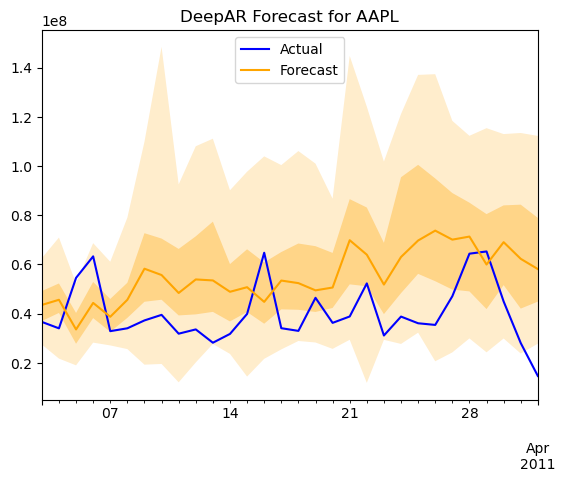

In [75]:
# Extract the time range for the forecast
forecast_start = forecasts[0].start_date
forecast_end = forecasts[0].start_date + len(forecasts[0].mean) * forecasts[0].freq

# Slice the actual time series to match the forecast range
actual_during_forecast = tss[0][forecast_start:forecast_end]

# Plot the overlapping part of the actual time series and forecast
plt.figure(figsize=(10, 6))
actual_during_forecast.plot(label="Actual", color="blue")
forecasts[0].plot(color="orange")  # Plot forecast with confidence intervals

# Add title and legend
plt.title(f"DeepAR Forecast for {ticker}")
plt.legend(["Actual", "Forecast"])
plt.show()


### Temporal Fusion Transformer

Global seed set to 42
C:\ProgramData\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (QuantileLoss). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new

Number of parameters in model: 332642


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predict:   0%|          | 0/28 [00:00<?, ? batches/s]

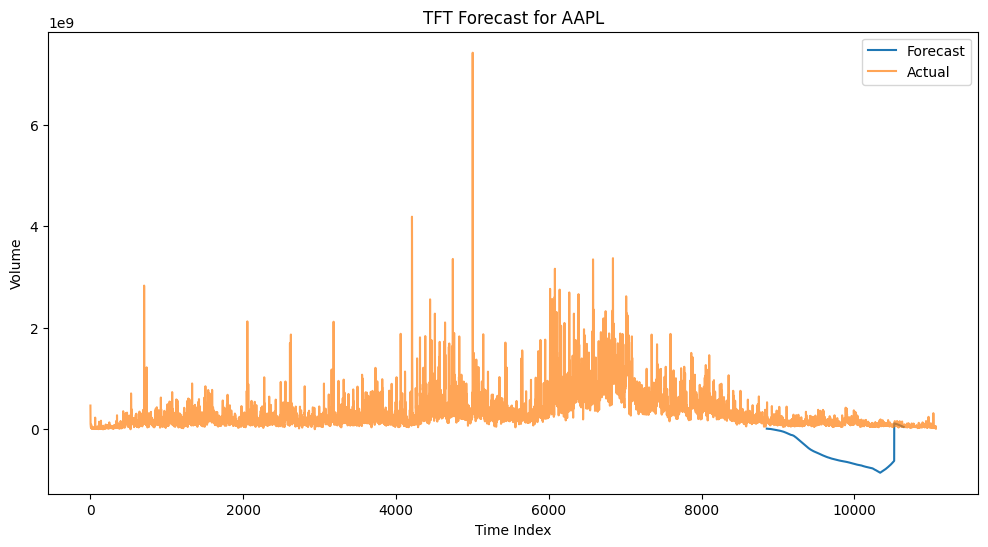

In [18]:
import torch
from sklearn.preprocessing import MinMaxScaler
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, seed_everything
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed_everything(42)

# Load and prepare data
dow_jones_df = pd.read_csv("dow_jones_data_clean.csv")
dow_jones_df['Date'] = pd.to_datetime(dow_jones_df['Date'])

# Filter for a specific ticker (e.g., AAPL)
ticker = "AAPL"
data = dow_jones_df[dow_jones_df['Ticker'] == ticker].copy()
data = data.sort_values('Date').reset_index(drop=True)

# Add necessary columns for TimeSeriesDataSet
data['time_idx'] = range(len(data))
data['group_id'] = 1  # Single group for AAPL

# Apply MinMaxScaler to scale the target and features
scaler_volume = MinMaxScaler()
scaler_features = MinMaxScaler()

# Scale the target (Volume)
data["Volume_scaled"] = scaler_volume.fit_transform(data[["Volume"]])

# Scale time-varying real features
real_features = ["Adj Close", "Close", "High", "Low", "Open"]
scaled_features = [f"{feat}_scaled" for feat in real_features]
data[scaled_features] = scaler_features.fit_transform(data[real_features])

# Define TimeSeriesDataSet
max_prediction_length = 365  # Forecast horizon
max_encoder_length = 365  # Context length

dataset = TimeSeriesDataSet(
    data,
    time_idx="time_idx",
    target="Volume_scaled",  # Use scaled volume
    group_ids=["group_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Ticker"],
    time_varying_known_reals=["time_idx"] + scaled_features,  # Use scaled features
    time_varying_unknown_reals=["Volume_scaled"],
    target_normalizer=None,
    add_relative_time_idx=True,
    add_target_scales=True,
)

# Split the data into training and validation sets
training_cutoff = int(data["time_idx"].max() * 0.8)
train_data = data[data["time_idx"] <= training_cutoff]
val_data = data[data["time_idx"] > training_cutoff]

train_ds = TimeSeriesDataSet.from_dataset(dataset, train_data)
val_ds = TimeSeriesDataSet.from_dataset(dataset, val_data)

# Create DataLoaders
train_loader = train_ds.to_dataloader(batch_size=64, shuffle=True, num_workers = 12)
val_loader = val_ds.to_dataloader(batch_size=64, shuffle=False, num_workers = 12)

# Create TFT model
tft = TemporalFusionTransformer.from_dataset(
    dataset,
    learning_rate=1e-4,  # Lower learning rate for better convergence
    hidden_size=64,  # Increased model complexity
    attention_head_size=8,
    dropout=0.1,
    hidden_continuous_size=32,
    output_size=7,  # Quantile regression
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

print(f"Number of parameters in model: {tft.size()}")

# Train the model
trainer = Trainer(
    max_epochs=100,
    gpus=1 if torch.cuda.is_available() else 0,
    gradient_clip_val=0.1,
)

trainer.fit(
    tft,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

# Generate predictions
predictions = tft.predict(val_loader, show_progress_bar=True)

# Inverse transform predictions to the original scale
predictions_rescaled = scaler_volume.inverse_transform(predictions.mean(axis=1).reshape(-1, 1)).flatten()

# Align val_data to predictions
val_data_aligned = val_data.iloc[:len(predictions_rescaled)]

# Plot predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(val_data_aligned["time_idx"], predictions_rescaled, label="Forecast")  # Forecasted values
plt.plot(data["time_idx"], data["Volume"], label="Actual", alpha=0.7)  # Actual values
plt.legend()
plt.title(f"TFT Forecast for {ticker}")
plt.xlabel("Time Index")
plt.ylabel("Volume")
plt.show()


Global seed set to 42
C:\ProgramData\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (QuantileLoss). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_full_state_property`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\torchmetrics\utilities\prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new

Number of parameters in model: 1395058


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Predict:   0%|          | 0/28 [00:00<?, ? batches/s]

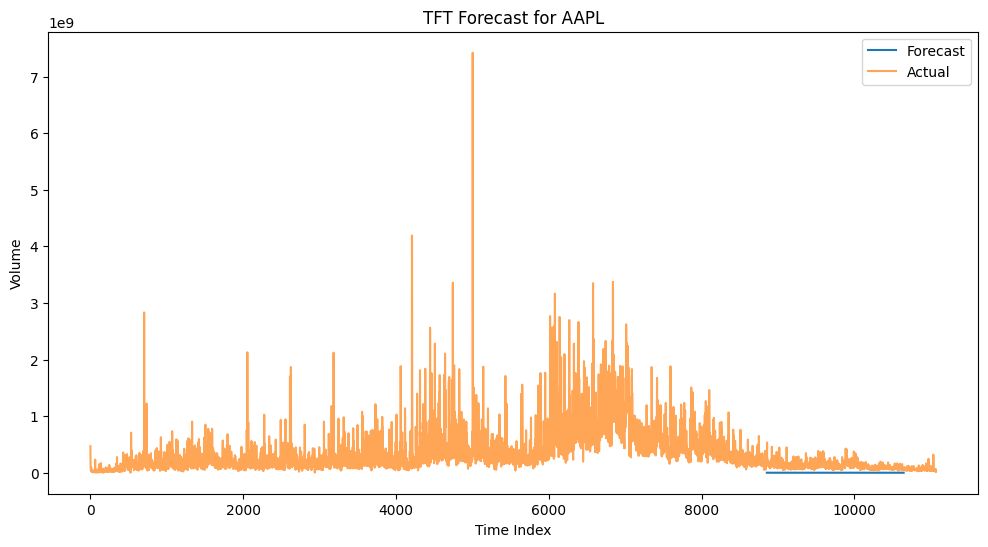

In [19]:
import torch
from sklearn.preprocessing import MinMaxScaler
from pytorch_forecasting import TimeSeriesDataSet
from pytorch_forecasting.models.temporal_fusion_transformer import TemporalFusionTransformer
from pytorch_forecasting.metrics import QuantileLoss
from pytorch_lightning import Trainer, seed_everything
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
seed_everything(42)

# Load and prepare data
dow_jones_df = pd.read_csv("dow_jones_data_clean.csv")
dow_jones_df['Date'] = pd.to_datetime(dow_jones_df['Date'])

# Filter for a specific ticker (e.g., AAPL)
ticker = "AAPL"
data = dow_jones_df[dow_jones_df['Ticker'] == ticker].copy()
data = data.sort_values('Date').reset_index(drop=True)

# Add necessary columns for TimeSeriesDataSet
data['time_idx'] = range(len(data))
data['group_id'] = 1  # Single group for AAPL

# Apply log transformation to stabilize variance
data["Volume_log"] = np.log1p(data["Volume"])

# Scale target (log-transformed) and features
scaler_volume = MinMaxScaler()
scaler_features = MinMaxScaler()

real_features = ["Adj Close", "Close", "High", "Low", "Open"]
scaled_features = [f"{feat}_scaled" for feat in real_features]

data["Volume_scaled"] = scaler_volume.fit_transform(data[["Volume_log"]])
data[scaled_features] = scaler_features.fit_transform(data[real_features])

# Add time-related features for seasonality
data["month"] = data["Date"].dt.month
data["day_of_week"] = data["Date"].dt.dayofweek

# Define TimeSeriesDataSet
max_prediction_length = 365  # Forecast horizon
max_encoder_length = 365  # Context length

dataset = TimeSeriesDataSet(
    data,
    time_idx="time_idx",
    target="Volume_scaled",
    group_ids=["group_id"],
    min_encoder_length=max_encoder_length // 2,
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=["Ticker"],
    time_varying_known_reals=["time_idx", "month", "day_of_week"] + scaled_features,
    time_varying_unknown_reals=["Volume_scaled"],
    target_normalizer=None,
    add_relative_time_idx=True,
    add_target_scales=True,
)

# Split the data into training and validation sets
training_cutoff = int(data["time_idx"].max() * 0.8)
train_data = data[data["time_idx"] <= training_cutoff]
val_data = data[data["time_idx"] > training_cutoff]

train_ds = TimeSeriesDataSet.from_dataset(dataset, train_data)
val_ds = TimeSeriesDataSet.from_dataset(dataset, val_data)

# Create DataLoaders
train_loader = train_ds.to_dataloader(batch_size=64, shuffle=True, num_workers=12)
val_loader = val_ds.to_dataloader(batch_size=64, shuffle=False, num_workers=12)

# Create Temporal Fusion Transformer (TFT) model
tft = TemporalFusionTransformer.from_dataset(
    dataset,
    learning_rate=1e-3,
    hidden_size=128,
    attention_head_size=16,
    dropout=0.1,
    hidden_continuous_size=64,
    output_size=7,  # Quantile regression
    loss=QuantileLoss(),
    log_interval=10,
    reduce_on_plateau_patience=4,
)

print(f"Number of parameters in model: {tft.size()}")

# Train the model
trainer = Trainer(
    max_epochs=100,
    gpus=1 if torch.cuda.is_available() else 0,
    gradient_clip_val=0.1,
)

trainer.fit(
    tft,
    train_dataloaders=train_loader,
    val_dataloaders=val_loader,
)

# Generate predictions
predictions = tft.predict(val_loader, show_progress_bar=True)

# Inverse transform predictions to the original scale
predictions_rescaled = scaler_volume.inverse_transform(predictions.mean(axis=1).reshape(-1, 1)).flatten()

# Align val_data to predictions
val_data_aligned = val_data.iloc[:len(predictions_rescaled)]

# Plot predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(val_data_aligned["time_idx"], predictions_rescaled, label="Forecast")  # Forecasted values
plt.plot(data["time_idx"], data["Volume"], label="Actual", alpha=0.7)  # Actual values
plt.legend()
plt.title(f"TFT Forecast for {ticker}")
plt.xlabel("Time Index")
plt.ylabel("Volume")
plt.show()
